In [2]:
import requests
import os
import json
import sys
import time
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.enums import Resampling

In [9]:
src = rasterio.open('orthophoto.tif')

# Get the number of bands in the TIFF file
num_bands = src.count

print(src.meta)
print(src.descriptions)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1217, 'height': 1053, 'count': 6, 'crs': CRS.from_epsg(32629), 'transform': Affine(0.23999999678716097, 0.0, 513398.3855669647,
       0.0, -0.24000000000063682, 4271985.930172)}
('Blue', 'Green', 'Red', 'NIR', 'Rededge', None)


In [10]:
src = rasterio.open('final.tif')

# Get the number of bands in the TIFF file
num_bands = src.count

print(src.meta)
print(src.descriptions)
src.descriptions[0] = 'Blue'
src.descriptions[1] = 'Green'
src.descriptions[2] = 'Red'
src.descriptions[3] = 'NIR'
src.descriptions[4] = 'Rededge'
src.descriptions[5] = 'None'
src.descriptions[6] = 'SAVI'
src.descriptions[7] = 'CHM'
print(src.descriptions[0])


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 5662, 'height': 5022, 'count': 8, 'crs': CRS.from_epsg(32629), 'transform': Affine(0.23999999678716097, 0.0, 513398.3855669647,
       0.0, -0.24000000000063682, 4271985.930172)}
(None, None, None, None, None, None, None, None)


TypeError: 'tuple' object does not support item assignment

In [24]:
res = requests.post('http://localhost:8000/api/token-auth/',
                    data={'username': 'ricsdatalab',
                          'password': 'ricsricsjabjab00$$'}).json()

token = res['token']

project_id = '114'
task_id = '92289b48-5c89-4863-9f80-602f1dc5b333'

res = requests.get("http://localhost:8000/api/projects/{}/tasks/{}/download/orthophoto.tif".format(project_id, task_id),
                    headers={'Authorization': 'JWT {}'.format(token)},
                    stream=True)
with open("orthophoto_s.tif", 'wb') as f:
    for chunk in res.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)



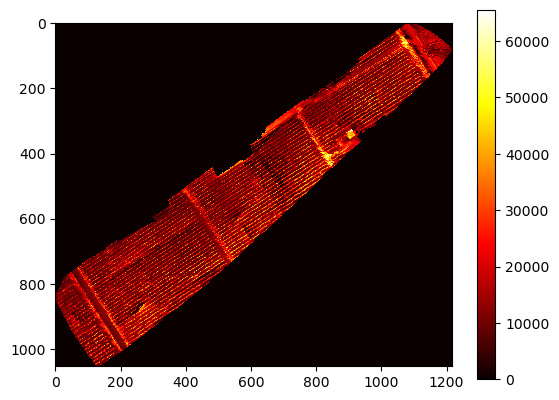

In [6]:
layer = src.read(2)

matrix = np.random.rand(20, 20)

# Create a heatmap using the imshow function
plt.imshow(layer, cmap='hot', interpolation='nearest')

# Add a colorbar to the graph
plt.colorbar()

# Show the plot
plt.show()